<a href="https://www.kaggle.com/code/mateuscpinheiro/eda-de-entregas-no-df-da-loggi?scriptVersionId=129513679" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Manipulação;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

Trata-se de base de dados disponibilizada pela empresa Loggi, referência no ramos de logística no Brasil, fundada em 2013.

O sistema utiliza veículo de motoristas parceiros para buscar no local de envio até um hub, faz conexões mais longas entre estas unidades e novamente um motorista realiza o 'last mile' de entrega.

Os informações mais detalhadas não foram citados no problema, portanto, nessa avaliação considerarei que cada identificador 'name' é uma saída de hub com um certo volume de encomendas e os códigos 'id' serão uma sequência temporal de entregas até que retorna ao hub.

A base de dados disponibilizada relaciona entregas de 3 hubs dentro do Distrito Federal.

### **1.1.  Loggi** 

A [Loggi](https://www.loggi.com/) é uma startup unicórnio brasileira de tecnologia focada em **logística**. A Loggi começou entregando apenas documentos entre 2013 e 2014. Dois anos depois, entrou no segmento de e-commerce. E, desde 2017, tem atuado nas entregas de alimentos também. 



> *Somos unicórnio! Com investimentos de SoftBank, Microsoft, GGV Capital, Monashees e Kaszek e outros, a Loggi está avaliada em US$ 1 bilhão.* ([fonte](https://carreira.loggi.com/conheca-a-loggi/nosso-negocio/))

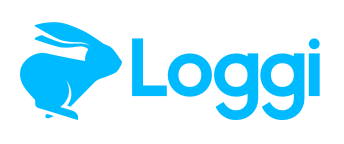

### **1.2.  Loggi BUD** 

O Loggi Benchmark for Urban Deliveries (BUD) é um repositório do GitHub ([link](https://github.com/loggi/loggibud)) com dados e códigos para problemas típicos que empresas de logística enfrentam: otimização das rotas de entrega, alocação de entregas nos veículos da frota com capacidade limitada, etc. Os dados são sintetizados de fontes públicas (IBGE, IPEA, etc.) e são representativos dos desafios que a startup enfrenta no dia a dia, especialmente com relação a sua escala. 

### **1.3.  Considerações iniciais** 

Trata-se de base de dados disponibilizada pela empresa Loggi, referência no ramos de logística no Brasil, fundada em 2013.

O sistema utiliza veículo de motoristas parceiros para buscar no local de envio até um hub, faz conexões mais longas entre estas unidades e novamente um motorista realiza o 'last mile' de entrega.

Os informações mais detalhadas não foram citados no problema, portanto, nessa avaliação considerarei que cada identificador 'name' é uma saída de hub com um certo volume de encomendas e os códigos 'id' serão uma sequência temporal de entregas até que retorna ao hub.

A base de dados disponibilizada relaciona entregas de 3 hubs dentro do Distrito Federal.

## 2\. Pacotes e bibliotecas

In [1]:
# pacotes nativos do python
import json

# pacotes de terceiros
import plotly.express as px
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import geopy
import geopy.distance
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import ipywidgets
from random import randint
import numpy as np

## 3\. Exploração de dados

### **3.1.  Avaliação e Importação dos dados** 

O dado bruto é um arquivo do tipo `JSON` com uma lista de instâncias de entregas. Cada instância representa um conjunto de **entregas** que devem ser realizadas pelos **veículos** do **hub** regional. Exemplo:

```json
[
  {
    "name": "cvrp-0-df-0",
    "region": "df-0",
    "origin": {"lng": -47.802664728268745, "lat": -15.657013854445248},
    "vehicle_capacity": 180,
    "deliveries": [
      {
        "id": "ed0993f8cc70d998342f38ee827176dc",
        "point": {"lng": -47.7496622016347, "lat": -15.65879313293694},
        "size": 10
      },
      {
        "id": "c7220154adc7a3def8f0b2b8a42677a9",
        "point": {"lng": -47.75887552060412, "lat": -15.651440380492554},
        "size": 10
      },
      ...
    ]
  }
]
...


Onde:

 - **name**: uma `string` com o nome único da instância;
 - **region**: uma `string` com o nome único da região do **hub**;
 - **origin**: um `dict` com a latitude e longitude da região do **hub**;
 - **vehicle_capacity**: um `int` com a soma da capacidade de carga dos **veículos** do **hub**;
 - **deliveries**: uma `list` de `dict` com as **entregas** que devem ser realizadas.

Sendo que:

 - **id**: uma `string` com o id único da **entrega**;
 - **point**: um `dict` com a latitude e longitude da **entrega**;
 - **size**: um `int` com o tamanho ou a carga que a **entrega** ocupa no **veículo**.

O dado bruto é um arquivo do tipo `JSON` com uma lista de instâncias de entregas. Cada instância representa um conjunto de **entregas** que devem ser realizadas pelos **veículos** do **hub** regional. Exemplo:

```json
[
  {
    "name": "cvrp-0-df-0",
    "region": "df-0",
    "origin": {"lng": -47.802664728268745, "lat": -15.657013854445248},
    "vehicle_capacity": 180,
    "deliveries": [
      {
        "id": "ed0993f8cc70d998342f38ee827176dc",
        "point": {"lng": -47.7496622016347, "lat": -15.65879313293694},
        "size": 10
      },
      {
        "id": "c7220154adc7a3def8f0b2b8a42677a9",
        "point": {"lng": -47.75887552060412, "lat": -15.651440380492554},
        "size": 10
      },
      ...
    ]
  }
]
...


O dado bruto está disponível para download neste [link](https://github.com/andre-marcos-perez/ebac-course-utils/blob/main/dataset/deliveries.json). Vamos realizar o seu download num arquivo `JSON` com o nome `deliveries.json`.





Vamos carregar os dados do arquivo em um dicionário Python chamado `data`:

In [2]:
with open('/kaggle/input/deliveries-loggi-df/deliveries.json', mode='r', encoding='utf8') as file:
  data = json.load(file)
  

In [3]:
len(data) # quantidade de códigos de saída do hub


199

### **3.2. Wrangling** 

In [4]:
deliveries_df = pd.DataFrame(data) # transforma dict em dataframe


In [5]:
deliveries_df.head()
# problema: origin e deliveries foram importados como dict


,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


#### 3.2.1\. **Coluna**: origin

Repare que a coluna `origin` contem dados `nested` ou aninhados na estrutura do JSON. Vamos normalizar a coluna com uma operação conhecida como `flatten` ou achatamento que transforma cada chave do JSON em uma nova coluna: 

In [6]:
#transforma dict em colunas
hub_origin_df = pd.json_normalize(deliveries_df["origin"]) #cria outro dataframe
hub_origin_df.head()


,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145


Com o dados achatados, vamos juntá-los ao conjunto de dados principal:

In [7]:
deliveries_df = pd.merge(left=deliveries_df, 
                         right=hub_origin_df, 
                         how='inner', 
                         left_index=True, 
                         right_index=True) # True => junção baseada no índice
deliveries_df.head()


,name,region,origin,vehicle_capacity,deliveries,lng,lat
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-47.893662,-15.805118
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.054989,-15.838145


In [8]:
deliveries_df = deliveries_df.drop("origin", axis=1) #retira coluna 'origin' original
deliveries_df = deliveries_df[["name", "region", "lng", "lat", "vehicle_capacity", "deliveries"]] #reorganiza colunas
deliveries_df.head()


,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [9]:
deliveries_df.rename(columns={"lng": "hub_lng", "lat": "hub_lat"}, inplace=True) # renomeia colunas
deliveries_df.head()


,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


#### 3.2.2\. **Coluna**: deliveries

Repare que a coluna `deliveries` contém dados uma lista de dados `nested` ou aninhados na estrutura do JSON. Vamos normalizar a coluna com uma operação conhecida como `explode` ou explosão que transforma cada elemento da lista em uma linha. Por fim, faremos os `flatten` ou achatamento do resultado coluna:

In [10]:
deliveries_exploded_df = deliveries_df[["deliveries"]].explode("deliveries") 
deliveries_exploded_df.head()


,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


In [11]:
deliveries_normalized_df = pd.concat([ # concatena os dataframes verticalmente sobre cada linha
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["size"])).rename(columns={"deliveries": "delivery_size"}), 
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])).rename(columns={"deliveries": "delivery_lng"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])).rename(columns={"deliveries": "delivery_lat"}),
], axis= 1)
#lambda para alocar os dados do dict na coluna de interesse
deliveries_normalized_df.head()


,delivery_size,delivery_lng,delivery_lat
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055


Com o dados explodidos, vamos normaliza-los para combina-los ao conjunto de dados principal:

In [12]:
len(deliveries_exploded_df)


636149

In [13]:
len(deliveries_df)


199

In [14]:
deliveries_df = deliveries_df.drop("deliveries", axis=1) #retira coluna original. #axis 0 para índice e 1 para coluna
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
deliveries_df.reset_index(inplace=True, drop=True)
deliveries_df.head()


,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


In [15]:
len(deliveries_df)


636149

#### **3.2.3. Incluir dados de coordenada no DataFrame**

1. Extrair bairro e cidade de cada coordenada de hub (este passo foi executado anteriormente pelo professor devido à limitação de volume de dados que o comando permite utilizar.

2. Por este motivo, o arquivo 'deliveries-geodata.csv', foi disponibilizado e incluído neste dataset, com os dados geográficos de todas 636.149 entregas.

In [16]:
deliveries_geodata_df = pd.read_csv('/kaggle/input/deliveries-loggi-df/deliveries-geodata.csv')
deliveries_geodata_df

,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol
...,...,...,...,...
636144,-48.064269,-15.997694,Gama,Setor Oeste
636145,-48.065176,-16.003597,Gama,Setor Oeste
636146,-48.065841,-16.003808,Gama,Setor Oeste
636147,-48.062327,-16.001568,Gama,Setor de Indústrias - Industrial


In [17]:
deliveries_geodata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   delivery_lng     636149 non-null  float64
 1   delivery_lat     636149 non-null  float64
 2   delivery_city    634447 non-null  object 
 3   delivery_suburb  476264 non-null  object 
dtypes: float64(2), object(2)
memory usage: 19.4+ MB


Alta taxa de dados nulos em `delivery_suburb`

In [18]:
deliveries_df = pd.merge(left=deliveries_df, 
                         right=deliveries_geodata_df[["delivery_city", "delivery_suburb"]], 
                         how="inner", 
                         left_index=True, 
                         right_index=True)
deliveries_df.head()


,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


#### 3.2.4\. DataFrame `analysis_df`



Avaliação da coluna 'delivery_size' por região através dos agregadores de soma, média e contagem

In [19]:
analysis_df = deliveries_df.groupby('region')['delivery_size'].agg(['sum','mean','count'])
analysis_df


,sum,mean,count
region,,,
df-0,385932,5.503722,70122
df-1,1681582,5.518667,304708
df-2,1439010,5.506718,261319


#### **3.2.5. DataFrame `pesquisa_df`: Um conjunto de entregas por hub** 

Será salvo à parte um DataFrame `pesquisa_df` com uma amostra de cada hub para avaliação de entregas.

In [20]:
while True:
    var=[]
    tamanho_pesquisa = []
    pesquisa_df = pd.DataFrame()
    for i in range (0,3):
        var2 = randint(1,90)
        var_temp = (f'cvrp-{i}-df-{var2}')
        var.append(var_temp)
        temp_df = deliveries_df[deliveries_df['name'] == var_temp]
        tamanho_pesquisa.append(temp_df.shape[0])
        pesquisa_df = pesquisa_df.append(temp_df)
    if  len(pesquisa_df["name"].unique()) == 3: 
        break # só quebra laço quando houver 3 nomes com resultado na lista

print (f'"names" selecionados: {pesquisa_df["name"].unique()},\n com tamanhos {tamanho_pesquisa}')
print(f' total = {pesquisa_df.shape[0]}')
tamanho = pesquisa_df.shape[0]

"names" selecionados: ['cvrp-0-df-80' 'cvrp-1-df-39' 'cvrp-2-df-2'],
 com tamanhos [971, 5327, 4001]
 total = 10299


#### **3.2.6. Avaliação da estrutura final** 

Com o dados em mãos, vamos conhecer um pouco melhor a estrutura do nosso conjunto de dados.

In [21]:
deliveries_df.shape


(636149, 10)

In [22]:
deliveries_df.columns


Index(['name', 'region', 'hub_lng', 'hub_lat', 'vehicle_capacity',
       'delivery_size', 'delivery_lng', 'delivery_lat', 'delivery_city',
       'delivery_suburb'],
      dtype='object')

In [23]:
deliveries_df.index


RangeIndex(start=0, stop=636149, step=1)

### **3.3. Exploração do schema - Análise descritiva** 

Descrição do dado da coluna e do tipo da coluna

In [24]:
deliveries_df.head(n=5)


,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


 - Colunas e seus respectivos tipos de dados.

In [25]:
deliveries_df.dtypes


name                 object
region               object
hub_lng             float64
hub_lat             float64
vehicle_capacity      int64
delivery_size         int64
delivery_lng        float64
delivery_lat        float64
delivery_city        object
delivery_suburb      object
dtype: object

 - Atributos **categóricos**.

In [26]:
deliveries_df.select_dtypes("object").describe().transpose() # seleciona colunas por tipo dtypes


,count,unique,top,freq
name,636149,199,cvrp-1-df-87,5636
region,636149,3,df-1,304708
delivery_city,634447,38,Brasília,148983
delivery_suburb,476264,167,Brasília,53795


 - Atributos **numéricos**.

In [27]:
deliveries_df.drop(["name", "region"], axis=1).select_dtypes('int64').describe().transpose()


,count,mean,std,min,25%,50%,75%,max
vehicle_capacity,636149.0,180.000000,0.000000,180.0,180.0,180.0,180.0,180.0
delivery_size,636149.0,5.512111,2.874557,1.0,3.0,6.0,8.0,10.0


* Dados faltantes




Podemos verificar quais colunas possuem dados faltantes.

In [28]:
deliveries_df.isna().any()


name                False
region              False
hub_lng             False
hub_lat             False
vehicle_capacity    False
delivery_size       False
delivery_lng        False
delivery_lat        False
delivery_city        True
delivery_suburb      True
dtype: bool

#### Taxa de nulos de delivery_city
0,26%

In [29]:
100 * (deliveries_df["delivery_city"].isna().sum() / len(deliveries_df))


0.26754738276724477

#### Taxa de nulos de delivery_suburb
25,13 %

In [30]:
100 * (deliveries_df["delivery_suburb"].isna().sum() / len(deliveries_df))

25.133262804783158

## 4\. Manipulação

#### **4.2. Cálculos de distância percorrida**

Considerando o DataFrame amostral `pesquisa_df,` foram feitas algumas análises de distância percorrida, criando as colunas: 
* `coord_delivs_i` - localização da entrega, 
*`coord_delivs_f` - localização da próxima entrega ou do hub, e 
* `distancia`, que é a distância geodésica entre as colunas anteriores

In [31]:
# necessário para adicionar novo índice, pois o index do DataFrame original estava impedindo concatenaçao futura
pesquisa_df.reset_index(inplace=True)
pesquisa_df.head()


,index,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,565400,cvrp-0-df-80,df-0,-47.802665,-15.657014,180,3,-47.759623,-15.655113,Sobradinho,NaN
1,565401,cvrp-0-df-80,df-0,-47.802665,-15.657014,180,1,-47.753799,-15.656590,Sobradinho,NaN
2,565402,cvrp-0-df-80,df-0,-47.802665,-15.657014,180,1,-47.754892,-15.657655,Sobradinho,NaN
3,565403,cvrp-0-df-80,df-0,-47.802665,-15.657014,180,3,-47.733461,-15.632251,Sobradinho,NaN
4,565404,cvrp-0-df-80,df-0,-47.802665,-15.657014,180,1,-47.753524,-15.654889,Sobradinho,NaN


Criando as coordenadas 'delivery_lat' e 'delivery_lng' iniciais e finais (estes são o da linha posterior ou do hub, se for o final)

Em seguida, utilizar a ferramenta `geopy.distance` para calcular a distância entre elas.

In [32]:

list_coord_i = []
list_coord_f = []
list_distance = []
for i in range(0,pesquisa_df.shape[0]):
    list_temp_i = []
    list_temp_f = []
    list_temp_dist = []
    list_temp_i.append(pesquisa_df.loc[i]['delivery_lat'])
    list_temp_i.append(pesquisa_df.loc[i]['delivery_lng'])
    list_coord_i.append(list_temp_i)
    if i == pesquisa_df.shape[0]-1: # na última linha, coordenada final é o hub
        list_temp_f.append(pesquisa_df.loc[i]['hub_lat'])
        list_temp_f.append(pesquisa_df.loc[i]['hub_lng'])
        list_coord_f.append(list_temp_f)
    else: # nas demais linhas, o destino é a próxima entrega
        list_temp_f.append(pesquisa_df.loc[i+1]['delivery_lat'])
        list_temp_f.append(pesquisa_df.loc[i+1]['delivery_lng'])
        list_coord_f.append(list_temp_f)
    #aplicar a cada linha a função de distância entre o inicial e o final
    list_temp_dist = geopy.distance.geodesic(list_temp_i, list_temp_f).km
    list_distance.append(list_temp_dist)
    

In [33]:
print(f'df pesquisa: {pesquisa_df.shape[0]}')
print(f'tamanho i: {len(list_coord_i)}')
print(f'tamanho f: {len(list_coord_f)}')
print(f'tamanho distância: {len(list_distance)}')
# comparação dos tamanhos para não ter erro ao incluir colunas

df pesquisa: 10299
tamanho i: 10299
tamanho f: 10299
tamanho distância: 10299


In [34]:
pesquisa_df['coord_delivs_i'] = list_coord_i
pesquisa_df['coord_delivs_f'] = list_coord_f
pesquisa_df['distancia'] = list_distance


In [35]:
pesquisa_df.sort_values('distancia', ascending = False)
# ver o final para ver como se comporta a distância ao final do código


,index,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb,coord_delivs_i,coord_delivs_f,distancia
19,565419,cvrp-0-df-80,df-0,-47.802665,-15.657014,180,5,-47.747237,-15.663401,Sobradinho,NaN,"[-15.6634009822127, -47.747236841221266]","[-15.995435286202037, -47.564676810220206]",41.622473
290,565690,cvrp-0-df-80,df-0,-47.802665,-15.657014,180,4,-47.650053,-15.630227,Planaltina,Setor Residencial Leste - Buritis I,"[-15.630226520866188, -47.650053018777946]","[-15.60409285040755, -47.951259302925855]",32.429291
23,565423,cvrp-0-df-80,df-0,-47.802665,-15.657014,180,3,-47.341966,-15.792093,Planaltina,Planaltina,"[-15.792092579727976, -47.34196610033401]","[-15.966403613565724, -47.55621211610284]",29.975820
22,565422,cvrp-0-df-80,df-0,-47.802665,-15.657014,180,8,-47.592692,-15.909882,Paranoá,NaN,"[-15.909882437547457, -47.59269192295642]","[-15.792092579727976, -47.34196610033401]",29.851994
6549,518111,cvrp-2-df-2,df-2,-48.054989,-15.838145,180,9,-48.048099,-15.899413,Riacho Fundo II,NaN,"[-15.899412873639438, -48.0480990287266]","[-15.681344551448603, -48.191304560935116]",28.595835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,565727,cvrp-0-df-80,df-0,-47.802665,-15.657014,180,2,-47.782825,-15.644673,Sobradinho,Sobradinho,"[-15.644673238919243, -47.782824952188086]","[-15.644673238919243, -47.782824952188086]",0.000000
7131,518693,cvrp-2-df-2,df-2,-48.054989,-15.838145,180,9,-47.997448,-16.007815,Santa Maria,Santa Maria,"[-16.00781507764937, -47.99744832067422]","[-16.00781507764937, -47.99744832067422]",0.000000
8378,519940,cvrp-2-df-2,df-2,-48.054989,-15.838145,180,9,-48.075587,-15.871340,Samambaia,Samambaia,"[-15.871340406335312, -48.07558691371611]","[-15.871340406335312, -48.07558691371611]",0.000000
9208,520770,cvrp-2-df-2,df-2,-48.054989,-15.838145,180,6,-47.979877,-15.820594,Guará,Guará,"[-15.820593983604802, -47.97987654885101]","[-15.820593983604802, -47.97987654885101]",0.000000


#### 4.3. DataFrame `distancia_df` a partir de `pesquisa_df`

In [36]:
distancia_df = pesquisa_df[['name','distancia']].groupby('name').describe()
distancia_df

distancia                                                         \
                 count      mean       std  min       25%       50%       75%   
name                                                                            
cvrp-0-df-80     971.0  2.114214  3.873066  0.0  0.595045  1.087209  1.773228   
cvrp-1-df-39    5327.0  0.838981  1.664248  0.0  0.245663  0.437321  0.802785   
cvrp-2-df-2     4001.0  1.168394  2.404436  0.0  0.339515  0.626518  1.054419   

                         
                    max  
name                     
cvrp-0-df-80  41.622473  
cvrp-1-df-39  27.303729  
cvrp-2-df-2   28.595835

##### 4.3.1 - Criação de variáveis de limite

Foram criados variáveis de quartis e máximo e mínimo do DataFrame amostral `distancia_df` a fim de manipular interativamente no gráfico.

In [37]:
#variáveis no bigode superior do boxplot
dist_75_perc = round(distancia_df['distancia']['75%'].max(),1)
dist_max = round(distancia_df['distancia']['max'].max(),1)

#variárias no bigode inferiores do boxplot
dist_25_perc = round(distancia_df['distancia']['25%'].min(),1)
dist_min = round(distancia_df['distancia']['min'].min(),1)

print(f'dist_75_perc: {dist_75_perc}')
print(f'dist_max: {dist_max}')
print(f'dist_25_perc: {dist_25_perc}')
print(f'dist_min: {dist_min}')

dist_75_perc: 1.8
dist_max: 41.6
dist_25_perc: 0.2
dist_min: 0.0


### 4.4. Avaliação dos resultados

In [38]:
pesquisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             10299 non-null  int64  
 1   name              10299 non-null  object 
 2   region            10299 non-null  object 
 3   hub_lng           10299 non-null  float64
 4   hub_lat           10299 non-null  float64
 5   vehicle_capacity  10299 non-null  int64  
 6   delivery_size     10299 non-null  int64  
 7   delivery_lng      10299 non-null  float64
 8   delivery_lat      10299 non-null  float64
 9   delivery_city     10270 non-null  object 
 10  delivery_suburb   7555 non-null   object 
 11  coord_delivs_i    10299 non-null  object 
 12  coord_delivs_f    10299 non-null  object 
 13  distancia         10299 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.1+ MB


In [39]:
distancia_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, cvrp-0-df-80 to cvrp-2-df-2
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (distancia, count)  3 non-null      float64
 1   (distancia, mean)   3 non-null      float64
 2   (distancia, std)    3 non-null      float64
 3   (distancia, min)    3 non-null      float64
 4   (distancia, 25%)    3 non-null      float64
 5   (distancia, 50%)    3 non-null      float64
 6   (distancia, 75%)    3 non-null      float64
 7   (distancia, max)    3 non-null      float64
dtypes: float64(8)
memory usage: 216.0+ bytes


## 5\. Visualização

### 5.1\. Avaliação da coluna 'delivery_size' por região

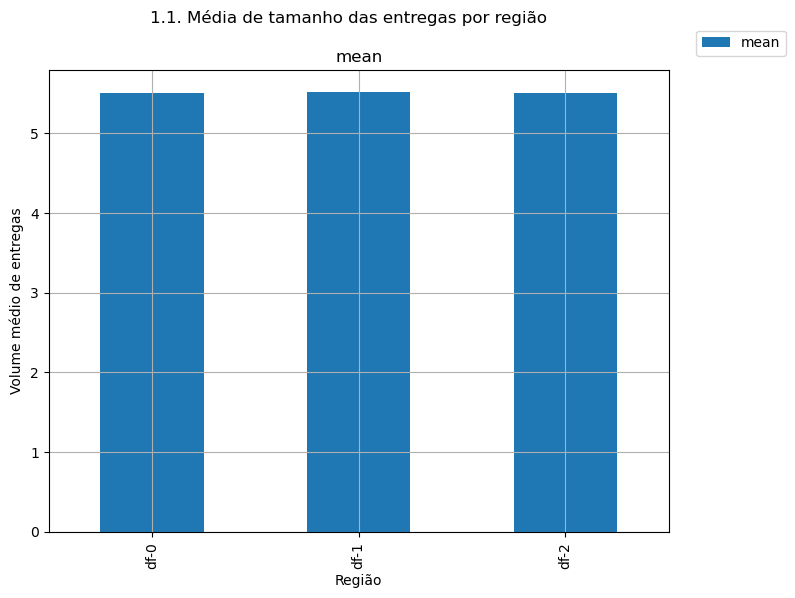

In [40]:
analysis_df['mean'].plot(kind='bar', 
                 title='1.1. Média de tamanho das entregas por região', 
                 xlabel='Região', 
                 ylabel='Volume médio de entregas',  
                 grid=True,
                 figsize=(8,6),
                 subplots=True);
    
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1.1));

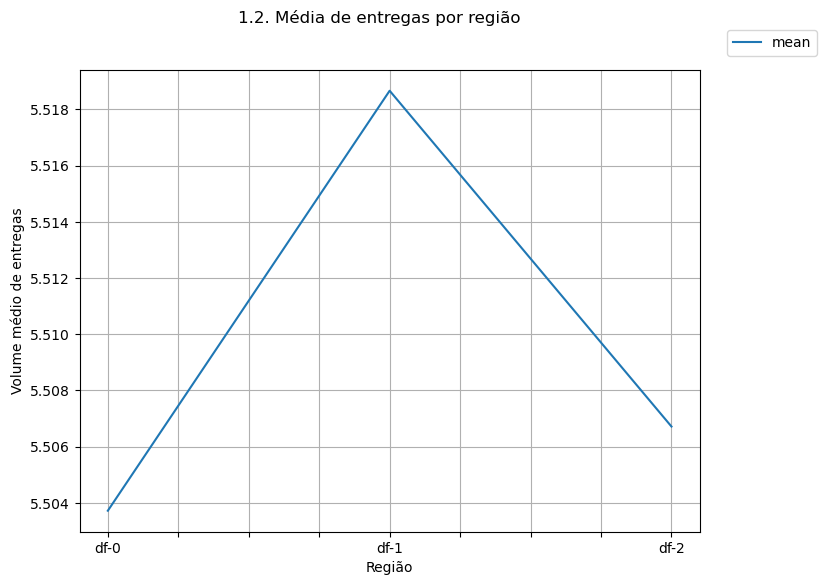

In [41]:
analysis_df['mean'].plot(kind='line', 
                 title='1.2. Média de entregas por região', 
                 xlabel='Região', 
                 ylabel='Volume médio de entregas',  
                 grid=True,
                 figsize=(8,6),
                 subplots=True);
    
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1.1));


#### Insign - Gráfico 1. Média de tamanho das entregas por região

Primeiramente, buscou-se entender se há diferença na eficiência de entregas entre os hubs. Ao plotar o gráfico "1.1. Média de tamanho das entregas por região", observou-se a equivalência entre os 3 hubs, sendo a df-1 (região central) levemente acima dos superiores. A diferença somente é visível na "1.2. Média de tamanho das entregas por região", observando-se a diferença de 0,6 volumes.

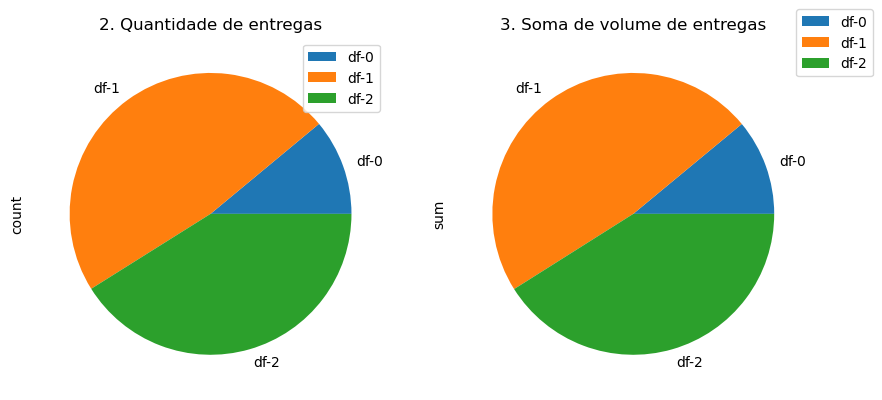

In [42]:
analysis_df[['count','sum']].plot(kind='pie', 
                            title=['2. Quantidade de entregas','3. Soma de volume de entregas'], 
                            xlabel='Região',
                            figsize=(10,8),
                            subplots=True);

plt.legend(loc='upper right',bbox_to_anchor=(1.2,1.1));


#### Insign - Gráficos 2. Quantidade de entregas e 3. Soma de volume de entregas

Como as médias de volume de entrega são praticamente, confirmou-se nos gráficos "2. Quantidade de entregas" e "3. Soma de volume de entregas" a proporcionalidade entre eles.

Notou-se que quase 50% das entregas são realizadas a partir do hub df-1 e um volume baixíssimo na df-0.



### 5.2\. Distribuição espacial das entregas

In [43]:
def set_samples(hubs = True, sample = 1000): # 1.000 amostras por padrão
    df = deliveries_df.sample(n = sample) # variar conforme a quantidade de amostras

    delivs_map = px.scatter_mapbox(df, 
                                    lat = "delivery_lat", 
                                    lon = "delivery_lng", 
                                    color = "region", # = hue
                                    title = "4. Locais de entrega/hubs por região", #título
                                    size = "delivery_size", # tamanho dos marcadores conforme atributo
                                    opacity = 0.3, # opacidade dos marcadores
                                    color_continuous_scale = px.colors.cyclical.IceFire, 
                                    width = 800, #comprimento
                                    height = 600, #altura
                                    zoom = 8.7, # de 0 a 20
                                    mapbox_style = "open-street-map") # API do mapa (aparência)
    if hubs: # plotar somente hubs, se verdadeiro
        hubs_df = deliveries_df.drop_duplicates('region')

        delivs_map = px.scatter_mapbox(hubs_df, 
                                       lat = "hub_lat", 
                                       lon = "hub_lng", 
                                       color = "region",
                                       title = "4. Locais de entrega/hubs por região", #título
                                       size = [15,15,15],
                                       opacity = 1, # sem transparência
                                       width = 800, #comprimento
                                       height = 600, #altura
                                       zoom = 8.7, # de 0 a 20
                                       mapbox_style = "open-street-map")
    delivs_map.show()


**Gráfico 4:**

Desmarque o campo 'hubs' para visualizar entregas

Utilize o comando 'sample' para alterar a quantidade de amostras no mapa.

In [44]:
ipywidgets.interactive(set_samples, sample=(100,160000,100))


interactive(children=(Checkbox(value=True, description='hubs'), IntSlider(value=1000, description='sample', ma…

#### 5.2.1\. Análise de uma amostra de `name` por região

In [45]:
def look_delivery(hubs = False): 
    
    selected_deliv_map = px.scatter_mapbox(pesquisa_df, 
                                            lat = "delivery_lat", 
                                            lon = "delivery_lng", 
                                            color = "name", # = uma entrega específica
                                            title = "5. Uma saída aleatória de cada hub", #título
                                            size = "delivery_size", # tamanho dos marcadores conforme atributo
                                            opacity = 0.3, # opacidade dos marcadores
                                            color_continuous_scale = px.colors.cyclical.IceFire, 
                                            width = 800, #comprimento
                                            height = 600, #altura
                                            zoom = 8.7, # de 0 a 20
                                            mapbox_style = "open-street-map") # API do mapa (aparência)

    if hubs: # plotar somente hubs, se verdadeiro
        hubs_df = deliveries_df.drop_duplicates('region')
        
        selected_deliv_map = px.scatter_mapbox(hubs_df, 
                                                lat = "hub_lat", 
                                                lon = "hub_lng", 
                                                color = "name",
                                                title = "5. Uma saída aleatória de cada hub", #título
                                                size = [15,15,15], # tamanho dos círculos dos hubs
                                                opacity = 1, # sem transparência
                                                width = 800, #comprimento
                                                height = 600, #altura
                                                zoom = 8.7, # de 0 a 20
                                                mapbox_style = "open-street-map")
    
    
    selected_deliv_map.show()


**Gráfico 5:**

Foi salvo na DataFrame 'pesquisa_df' um conjunto de entregas, da coluna 'name' de cada hub

Marque o campo 'hubs' para visualizar localização dos hubs

In [46]:
ipywidgets.interactive(look_delivery)


interactive(children=(Checkbox(value=False, description='hubs'), Output()), _dom_classes=('widget-interact',))

#### Insign - Gráficos 4. Locais de entrega/hubs por região e  5. Uma saída aleatória de cada hub

A primeira curiosidade é a localização dos hubs em si para entender. A df-0 se localiza em Sobradinho/DF,a df-1 na Asa Sul/DF e a df-2 em Taguatinga/DF, região sul.

Com a amostragem total de 636.149, sobrecarrega tanto a memória do caderno, quanto o visual mapa.

Analisando várias quantidades de amostra, cheguou-se à conclusão que 80.000 é a quantidade mínima para enxergar bem a distribuição e concentração das entregas por hub nas Região Administrativa.

A df-1 concentra-se em uma área central, não se esquecendo que ela é responsável por quase metade das entregas. Do lado oporto, a df-0 atende a quase 50% do Distrito Federal, em especial, as regiões com menor densidade demográfica, lembrando que ao mesmo tempo tem um volume de entregas muito menor em relação aos demais.

Agora observando-se 1.000 amostras de entregas, é possível enxergar a concentração em alguas Regiões Administrativas onde não há hubs: 
- df-0: Planaltina e Paranoá-Itapoã.
- df-1: Jardim Botânico-São Sebastião, Park Way e Asa Norte-Lago Norte.
- df-2: Gama-Santa Maria e Brazlândia
Isolando os dados no Gráfico “5. Uma Saída aleatória de cada hub”, cada saída identificada por ‘name’, observa-se que se repetem as mesmas regiões de concentração citadas anteriormente.

### 5.3\. Linha temporal de cada amostra isolada

In [47]:
def track_delivery(rastreio = 3, hubs=False): 
    rastreio_df = pesquisa_df.head(rastreio)
    fig1 = px.line_mapbox(rastreio_df, 
                            lat="delivery_lat", 
                            lon="delivery_lng", 
                            color="name", # = hue
                            title = "6. Linha temporal de entregas", #título
                            line_group= "name", 
                            width = 800, #comprimento
                            height=600, #altura
                            zoom=8.7, # de 0 a 20
                            mapbox_style="open-street-map") # API do mapa (aparência)
            
    if hubs: # check box para visualizar os hubs isoladamente
        hubs_df = deliveries_df.drop_duplicates('region')
            
        fig1 = px.scatter_mapbox(hubs_df, 
                                    lat="hub_lat", 
                                    lon="hub_lng", 
                                    color="name",
                                    title = "6. Linha temporal de entregas", #título
                                    size=[7,7,7], # tamanho dos círculos dos hubs
                                    opacity=1,
                                    width = 800, #comprimento
                                    height=600, #altura
                                    zoom=8.7, # de 0 a 20
                                    mapbox_style="open-street-map")
    fig1.show()

**Gráfico 6:**

Marque o campo 'hubs' para visualizar localização dos hubs

Utilize o comando 'rastreio' para navegar pela sequência de entregas no mapa.

In [48]:
ipywidgets.interact(track_delivery, rastreio=(2,tamanho)); 
#ipywidgets.Play(min=2, max=tamanho)) #seria bacana, mas ficou muito pesado


interactive(children=(IntSlider(value=3, description='rastreio', max=10299, min=2), Checkbox(value=False, desc…

#### 5.3.1\. Avaliação das distâncias percorridas por entrega sequencial

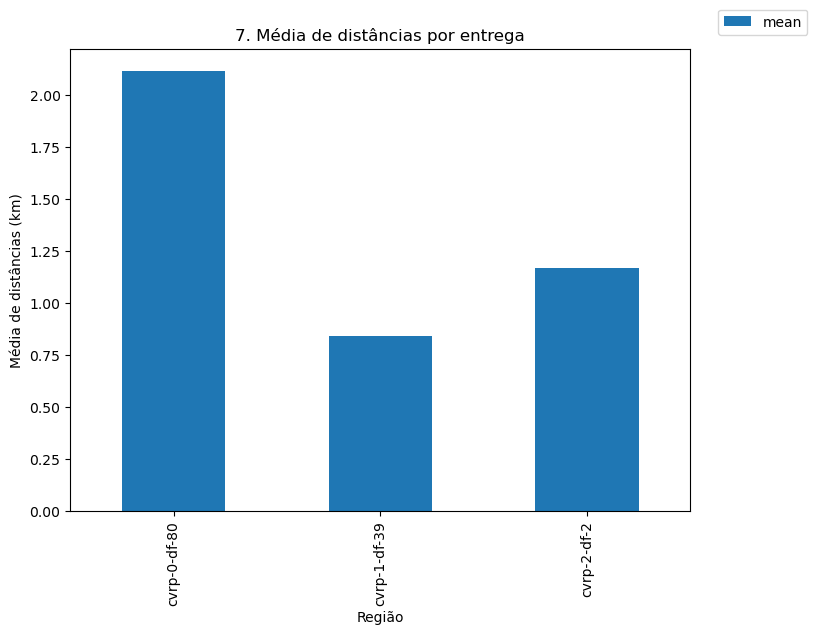

In [49]:
distancia_df['distancia']['mean'].plot(kind='bar', 
                                        title='7. Média de distâncias por entrega', 
                                        xlabel='Região', 
                                        ylabel='Média de distâncias (km)',  
                                        figsize=(8,6));
    
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1.1));

#### Insign - Gráficos 6. Linha temporal de entregas e 7. Média de distâncias por entrega

Supondo-se que uma entrega seja feita conforme a sequência de localizações informada na base de dados, o mapa “6. Linha temporal de entregas” revela como o deslocamento é relevante na df-0, o que é confirmado no gráfico “7. Média de distâncias por entrega”.

#### 5.3.2. Distribuição de distâncias

In [50]:
def amplitude_distancia (maximo = dist_max, minimo = dist_min, histplot = False, colunas = 20):
    visual_df = pesquisa_df[pesquisa_df.distancia < maximo]
    visual_df = visual_df[visual_df.distancia > minimo] # visual_df para mostrar dentro dos limites informados
    
    if histplot:
        graf8 = sns.histplot(x=visual_df.distancia, 
                                hue = visual_df.name,
                                multiple='fill', # empilha as colunas formando 100%
                                bins=colunas);

    else:
        graf8 = sns.boxplot(x=visual_df.distancia, 
                                y=visual_df.name)
                   
    graf8.set_title('8. Distribuição de distâncias por hub')

**Gráfico 8:**

Utilize o comando 'maximo' e 'minimo' para delimitar os valores máximos e mínimos,respectivamente, a serem mostrados no gráfico

Marque o campo 'histplot' para visualizar em forma de histograma

Utilize o comando 'colunas' para alterar a quantidade de colunas do histograma.

In [51]:
ipywidgets.interact(amplitude_distancia,
                    colunas=(1,40),
                    maximo=(dist_75_perc, dist_max), 
                    minimo=(dist_min,dist_25_perc,0.01));

interactive(children=(FloatSlider(value=41.6, description='maximo', max=41.6, min=1.8), FloatSlider(value=0.0,…

---

#### Insign - Gráfico 8. Distribuição de distâncias por hub

No boxplot, é possível ver que, independente da amostra aleatória selecionada, a distribuição das distâncias percorridas na df-0 são as maiores enquanto as da df-1 são as menores.

As informações convergem para as mesmas deduções visualizadas nos gráficos anteriores.

Na versão histograma do mesmo gráfico, é esperado que as entregas de df-0 predominem à medida que a distância aumenta. 

### 5.4. Entregas por Regiões administrativas

In [52]:
deliveries_not_null_df = deliveries_df[deliveries_df.delivery_city.notnull()]
df = deliveries_not_null_df.groupby('delivery_city')['delivery_size'].agg('sum')

# transformar série em dataframe
df = df.to_frame()
df2 = df.reset_index()

df2 = df2.sort_values(by='delivery_size', ascending=False)

df2.head()

,delivery_city,delivery_size
2,Brasília,822171
33,Taguatinga,250709
31,Sudoeste / Octogonal,244214
6,Ceilândia,208312
36,Águas Claras,204751


In [53]:
def show_towns (topo = 8):
    sns.set_style('whitegrid')
    df3 = df2.head(topo)
    grafico = sns.barplot(data = df3,
                        y = df3.delivery_city,
                        x = df3.delivery_size)
    grafico.set_title("9. Volume de Entregas por Região Administrativa", fontsize=12);
    

Gráfico das 30 regiões com maior volume de entregas.

In [54]:
ipywidgets.interactive(show_towns, topo = (1,30,1))

interactive(children=(IntSlider(value=8, description='topo', max=30, min=1), Output()), _dom_classes=('widget-…

#### Insign - Gráfico 9. Entregas por Região Administrativa

Analisando as 15 RAs com maior volume:
- Observa-se a grande concentração das entregas em Brasília (que engloba a Asa Sul e Asa Norte), onde e localiza o hub df-1. Também atende: Sudoeste/Octogonal (3º maior volume), metade do Guará (6º), Lago Sul (7º), Lago Norte (9º) e Jardim Botânico (14º).

- Taguatinga (2º) é onde se localiza a df-2. Atende Ceilândia (4º), Águas Claras (5º), metade do Guará (6º), Gama (10º), Samambaia (11º), Vicente Pires (13º) e Santa Maria (15º).  

- Sobradinho (8º), o hub df-0. Atende somente Planaltina (12º) dentre os 15 mais volumosos.

Analisando as 15 RAs com maior volume:  

### 5.5\. Breve estudo das RAs.

 Conforme ZEEDF (link em Fontes) - Página 23, Tabela 9, as regiões com maior taxa de crescimento de 2000 a 2010 são: 
 - Itapoã (937,49%), 
 - Águas Claras (364.26%), 
 - Vicente Pires (257,12%), 
 - Estrutural (137,54%), 
 - Jardim Botânico (107,44%), e
 - Riacho Fundo (91,02%).

Conforme a mesma fonte, as RAs com maior Renda Domiciliar Média Mensão (RDMM) per capita são: 
- Entre R$ 5.000,00 e 6.000,00: Lago Sul.

- Entre R$ 4.000,00 e 5.000,00: Lago Norte e Sudoeste/Octogonal.

- Entre R$ 3.000,00 e 4.000,00: Brasília, Park Way e Jardim Botânico.

- Entre R$ 2.000,00 e 3.000,00: Águas Claras.

### 5.6. Análises estratégicas
* df-0:

 Visualiza-se que é a região que tem menor volume e maior área de atendimento. Infere-se que tem o maior custo de combustível dentre as três.

 Caso não haja intenção de capilarizar com novos hubs devido à proximidade com outro já existente, deve-se avaliar se há distribuição de entregadores parceiros suficientes para atender à região e/ou métodos de atração de mais para suprir as demandas (como taxa de bônus por entrega).

* Novos hubs:

 Avaliar instalação de hubs em (1) Planaltina, (2) Brazlândia, (3) Eixo Gama-Santa Maria, (4) Eixo São Sebastião-Jardim Botânico e (5) Eixo Itapoã-Paranoá, onde o custo médio da região é potencialmente menor (fonte) e pode ser mais econômica, considerando o custo de deslocamento (combustível) para se chegar a essas regiões.

* Jardim Botânico/São Sebastião:

 Dentre as RAs citadas, o **Jardim Botânico** desponta entre as 6 maiores renda domiciliar média, conforme Figura 9 – Renda Domiciliar Média Mensal (RDMM) - ZEE - página 31. Considera-se estratégico dar atenção à região, inclusive devido ao volume de entregas em São Sebastião.

* Atendimento de regiões limítrofes do DF

 Avaliar se é vantajoso no aspecto tributário (ICMS) utilizar os hubs dos municípios adjacentes ao Distrito Federal (Águas Lindas /GO, Santo Antônio do Descoberto/GO, Planaltina/GO, Luziânia/GO, Valparaíso/GO, Jardim ABC/GO) para entregas em regiões mais isoladas nas regiões próximas aos limites.


## 6\. Fontes

* Agrupar e aplicar fórmula - https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html


* Biblioteca .scatter_mapbox
https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html

* Plotar linhas no mapa
https://plotly.com/python/lines-on-mapbox/

* Calcular distâncias no mapa
https://geopy.readthedocs.io/en/stable/#module-geopy.distance

* Preço médio por região: https://conteudoimob.com.br/noticias/preco-medio-do-m%C2%B2-em-brasilia-e-r-9-885-aponta-wimoveis/

* Zoneamento econômico do DF
https://www.zee.df.gov.br/wp-content/uploads/2018/05/ZEEDF_CT02_Matriz-Socioeconomica_01-Dinamicas-Socioeconomicas.pdf